In [83]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib notebook

In [54]:
df = pd.read_csv("./data/BlackFriday.csv")

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [56]:
## Remove capitals from column names

df.columns = [col.lower() for col in df.columns]
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [57]:
## Check dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            370591 non-null float64
product_category_3            164278 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [66]:
## Check value counts in product categories

df["product_category_2"].value_counts().sort_index()

2.0     48481
3.0      2835
4.0     25225
5.0     25874
6.0     16251
7.0       615
8.0     63058
9.0      5591
10.0     2991
11.0    13945
12.0     5419
13.0    10369
14.0    54158
15.0    37317
16.0    42602
17.0    13130
18.0     2730
Name: product_category_2, dtype: int64

In [67]:
## Fill missing Values in product_category_2 and product_category_3 with 0

df["product_category_2"] = df["product_category_2"].fillna(0)
df["product_category_3"] = df["product_category_3"].fillna(0)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            537577 non-null float64
product_category_3            537577 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [70]:
## Check Occupation, Marital_Status and Product Categories

df["occupation"].value_counts().sort_index()

0     68120
1     45971
2     25845
3     17366
4     70862
5     11985
6     19822
7     57806
8      1524
9      6153
10    12623
11    11338
12    30423
13     7548
14    26712
15    11812
16    24790
17    39090
18     6525
19     8352
20    32910
Name: occupation, dtype: int64

In [71]:
df["marital_status"].value_counts().sort_index()

0    317817
1    219760
Name: marital_status, dtype: int64

In [72]:
## Convert user_id to str and product categories to int

df["user_id"] = df["user_id"].astype(object)

cols_to_int = ["product_category_2", "product_category_3"]

for col in cols_to_int:
    df[col] = df[col].astype(int)

In [47]:
df.dtypes

user_id                       object
product_id                    object
gender                        object
age                           object
occupation                    object
city_category                 object
stay_in_current_city_years    object
marital_status                object
product_category_1            object
product_category_2            object
product_category_3            object
purchase                       int64
dtype: object

In [5]:
## unique customer count

len(df["user_id"].unique())

5891

In [74]:
srs_transaction_count = df["user_id"].value_counts()
srs_transaction_count.head()

1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
Name: user_id, dtype: int64

<IPython.core.display.Javascript object>


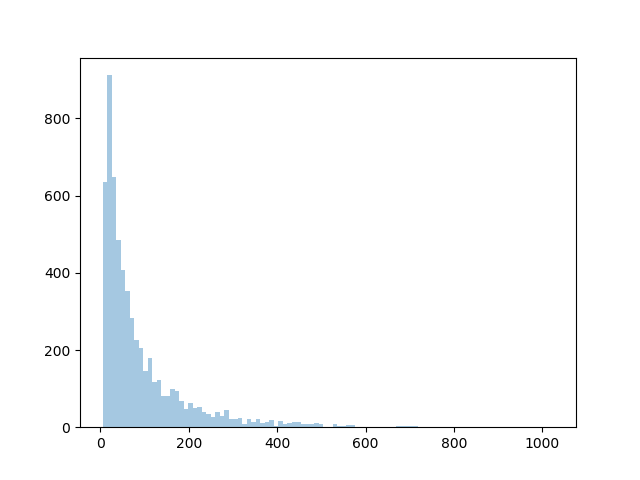

In [86]:
## plot histogram for number of bought items per customer

plt.figure()
sns.distplot(srs_transaction_count.values, bins=100, kde=False)
plt.show()

In [89]:
age_counts = df["age"].value_counts().sort_index()
age_counts

0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: age, dtype: int64

<IPython.core.display.Javascript object>


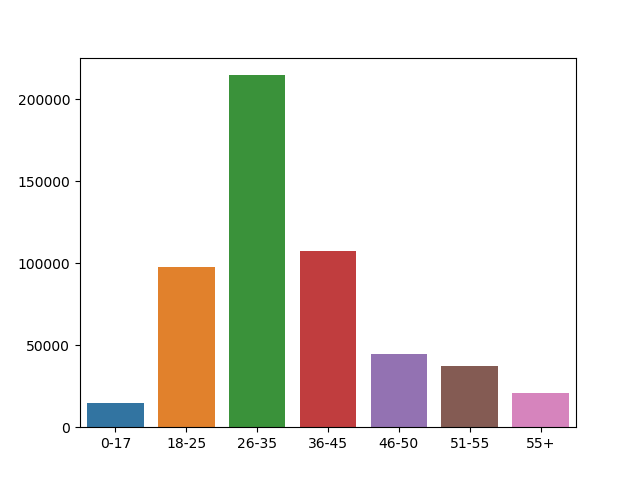

In [91]:
## plot a barplot of the age counts
plt.figure()
sns.barplot(age_counts.index, age_counts.values)
plt.show()

In [96]:
## How many customers were per age group

customer_counts = df.groupby("user_id")["age"].apply(max).value_counts().sort_index()

<IPython.core.display.Javascript object>


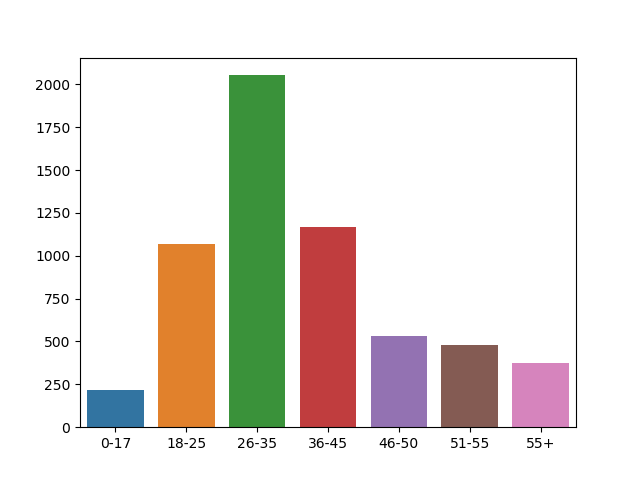

In [97]:
plt.figure()
sns.barplot(customer_counts.index, customer_counts.values)
plt.show()

In [98]:
## How much money did the customers spend per age group

age_spent = df.groupby("age")["purchase"].apply(sum)
age_spent

age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: purchase, dtype: int64

<IPython.core.display.Javascript object>


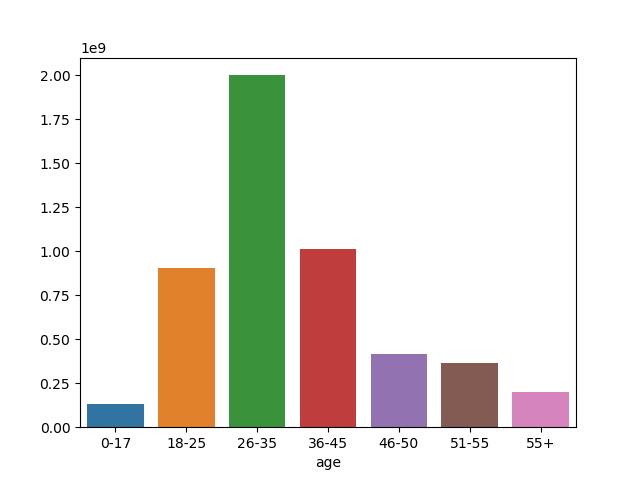

In [99]:
plt.figure()
sns.barplot(age_spent.index, age_spent.values)
plt.show()

In [189]:
age_avg = df.groupby("age")["purchase"].apply(np.mean)
age_avg

age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: purchase, dtype: float64

<IPython.core.display.Javascript object>


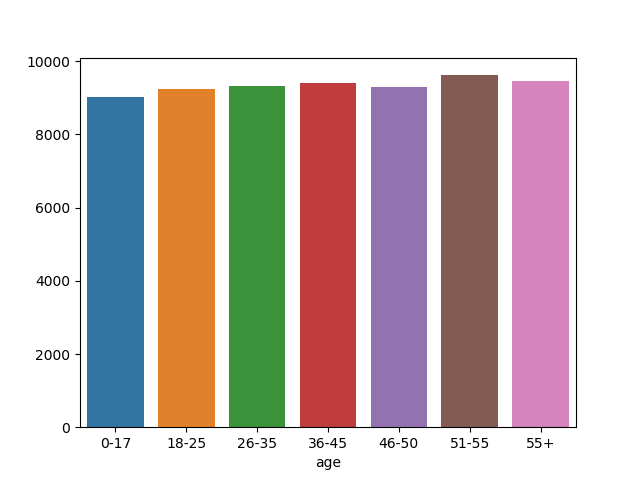

In [197]:
plt.figure()
sns.barplot(age_avg.index, age_avg.values)
plt.show()

In [121]:
## transaction count per city category
city_srs = df["city_category"].value_counts()
city_srs

B    226493
C    166446
A    144638
Name: city_category, dtype: int64

<IPython.core.display.Javascript object>


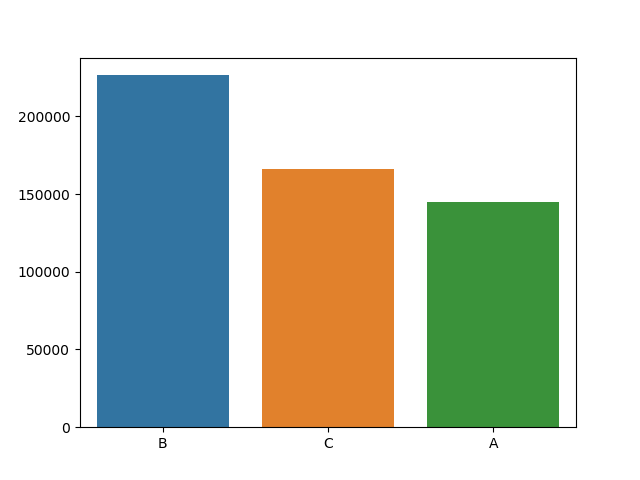

In [122]:
plt.figure()
sns.barplot(city_srs.index, city_srs.values)
plt.show()

In [124]:
srs_purchase_sum = df.groupby("user_id")["purchase"].apply(sum).reset_index()
srs_categories = df.groupby("user_id")[["marital_status", "gender", "age", "city_category", "stay_in_current_city_years" ]].apply(max).reset_index()
df_unique = srs_categories.merge(srs_purchase_sum, on="user_id").sort_values("age")
df_unique.head()

,user_id,marital_status,gender,age,city_category,stay_in_current_city_years,purchase
0,1000001,0,F,0-17,A,2,333481
1873,1001929,0,F,0-17,A,0,112864
4458,1004572,0,F,0-17,C,0,630789
4461,1004575,0,F,0-17,C,2,365760
1872,1001928,0,M,0-17,B,1,1324537


<IPython.core.display.Javascript object>


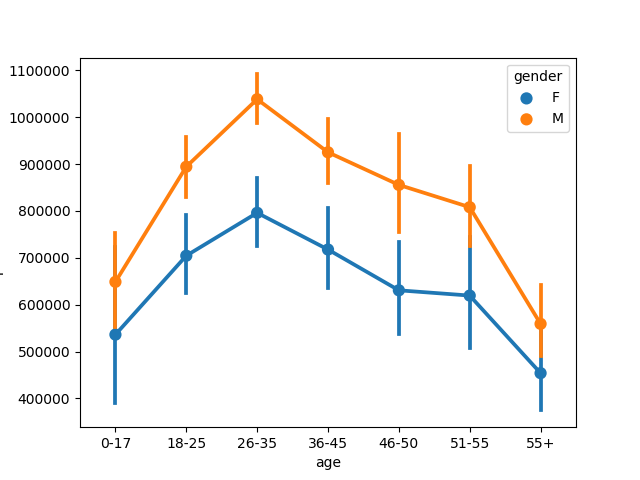

In [127]:
plt.figure()
sns.pointplot(x="age", y="purchase", hue="gender", data=df_unique)
plt.show()

<IPython.core.display.Javascript object>


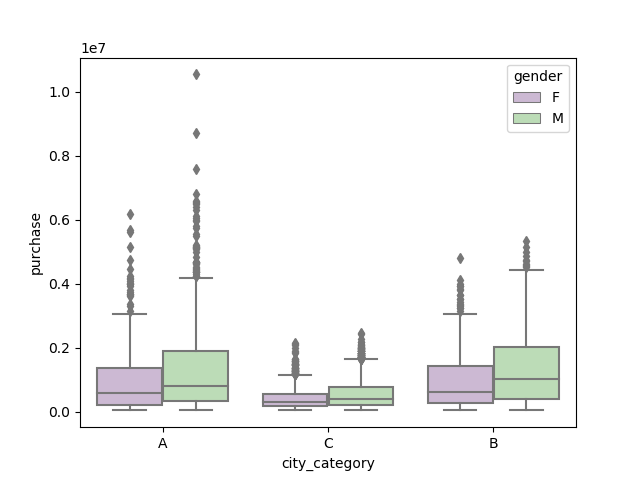

In [130]:
##boxplot of spent money per city category and gender

plt.figure()
sns.boxplot(x="city_category", y="purchase", hue="gender", data=df_unique, palette="PRGn")
plt.show()

<IPython.core.display.Javascript object>


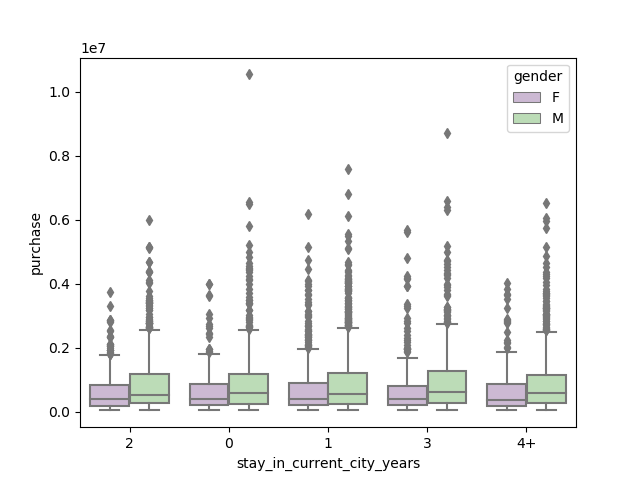

In [140]:
##boxplot of spent money per city category and gender

plt.figure()
sns.boxplot(x="stay_in_current_city_years", y="purchase", hue="gender", data=df_unique, palette="PRGn")
plt.show()

<IPython.core.display.Javascript object>


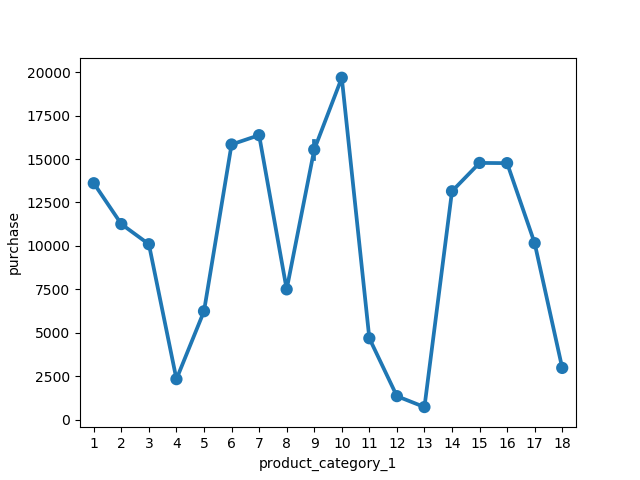

In [132]:
plt.figure()
sns.pointplot(x="product_category_1", y="purchase", data=df, estimator=np.mean)
plt.show()

In [149]:
srs_category_ratio = df.groupby("product_category_1").apply(lambda x: (len(x) / len(df))*100).reset_index()
srs_category_mean = df.groupby("product_category_1")["purchase"].apply(np.mean).reset_index()

df_category_1 = srs_category_ratio.merge(srs_category_mean, on="product_category_1")
df_category_1.columns =["category", "purchase_ratio", "avg_purchase"]
df_category_1.head()

,category,purchase_ratio,avg_purchase
0,1,25.736406,13607.701495
1,2,4.371281,11255.680752
2,3,3.692308,10096.841705
3,4,2.151692,2328.862886
4,5,27.641064,6238.004045


<IPython.core.display.Javascript object>


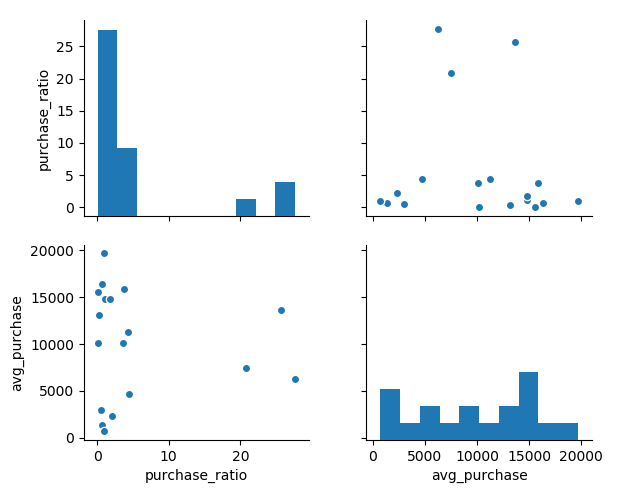

In [150]:
sns.pairplot(df_category_1[["purchase_ratio", "avg_purchase"]])
plt.show()

<IPython.core.display.Javascript object>


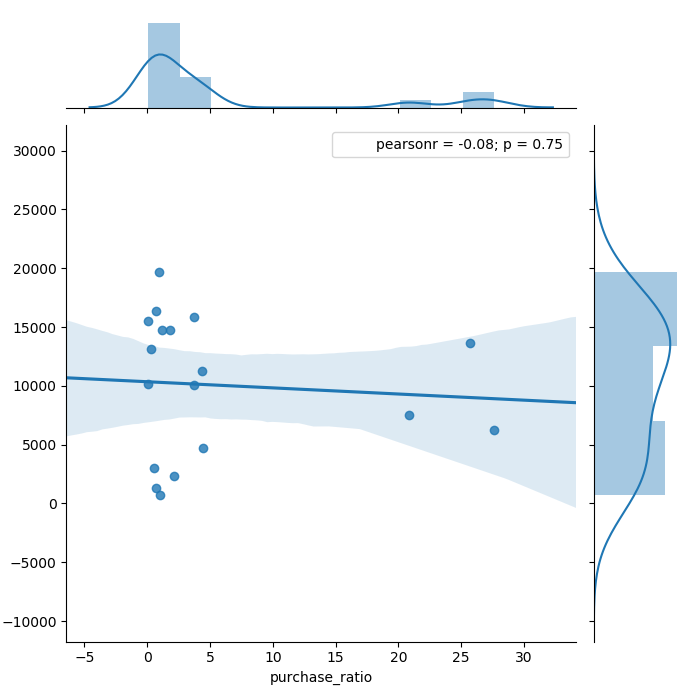

In [155]:
sns.jointplot(x="purchase_ratio", y="avg_purchase", data=df_category_1, kind="reg", size=7)
plt.show()

In [162]:
product_count = df.groupby("product_id").apply(len).reset_index()
product_price = df.groupby("product_id")["purchase"].apply(np.mean).reset_index()

df_product = product_count.merge(product_price, on="product_id")
df_product.columns=["product_id", "purchase_count", "avg_price"]
df_product.head()

,product_id,purchase_count,avg_price
0,P00000142,1130,11143.507080
1,P00000242,371,10552.293801
2,P00000342,238,5299.928571
3,P00000442,92,4795.358696
4,P00000542,146,5419.308219


<IPython.core.display.Javascript object>


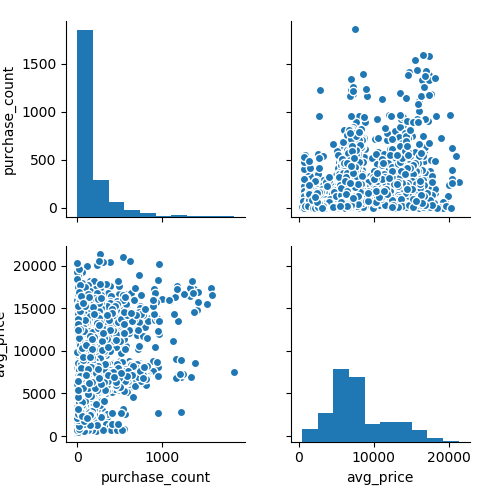

In [163]:
sns.pairplot(df_product[["purchase_count", "avg_price"]])
plt.show()

<IPython.core.display.Javascript object>


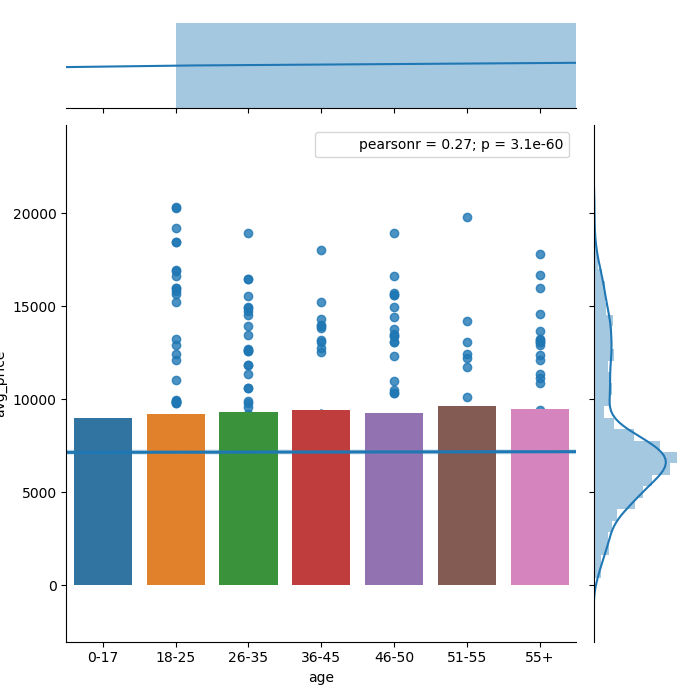

In [169]:
sns.jointplot(x="purchase_count", y="avg_price", data=df_product, kind="reg", size=7)
plt.show()

In [200]:
## Some machine learning

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

from sklearn.preprocessing import LabelEncoder

In [179]:
df_unique["age_num"] = LabelEncoder().fit_transform(df_unique["age"])
df_unique["gender_num"] = LabelEncoder().fit_transform(df_unique["gender"])
df_unique["city_category_num"] = LabelEncoder().fit_transform(df_unique["city_category"])
df_unique["stay_in_current_city_years_num"] = LabelEncoder().fit_transform(df_unique["stay_in_current_city_years"])

In [180]:
df_unique.dtypes

user_id                            int64
marital_status                     int64
gender                            object
age                               object
city_category                     object
stay_in_current_city_years        object
purchase                           int64
age_num                            int64
gender_num                         int64
city_category_num                  int64
stay_in_current_city_years_num     int64
dtype: object

In [181]:
features = ["marital_status", "age_num", "city_category_num", "stay_in_current_city_years_num", "purchase"]
X = df_unique[features]
y = df_unique["gender_num"]

In [185]:
X.shape

(5891, 5)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [205]:
from scipy.stats import randint as sp_randint, uniform
from time import time

def printMeasures(y_test, y_pred):
    confMatr = confusion_matrix(y_test, y_pred)
    confDf = pd.DataFrame(confMatr)
    confDf.columns = ["neg_pred", "pos_pred"]
    confDf.index = ["neg_actual", "pos_actual"]
    
    print(confDf)
    print("\r\n")
    print("Accuracy: {0:.2f}" .format(accuracy_score(y_test, y_pred)))
    print("Recall: {0:.2f}".format(recall_score(y_test, y_pred)))
    print("Precision: {0:.2f}".format(precision_score(y_test, y_pred))) 
    print("F1-Score: {0:.2f}".format(f1_score(y_test, y_pred)))
    print("Area under ROC Curve: {0:.2f}".format(roc_auc_score(y_test, y_pred)))
    
    return None

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
clf = RandomForestClassifier(class_weight="balanced")
param_dist = {"max_depth": [3, None],
              "n_estimators": sp_randint(300,2000),
              "max_features": sp_randint(1, 5),
              "min_samples_split": sp_randint(4, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring=make_scorer(f1_score), cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 441.44 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.751 (std: 0.004)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 1152}

Model with rank: 2
Mean validation score: 0.750 (std: 0.013)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_split': 9, 'n_estimators': 1907}

Model with rank: 3
Mean validation score: 0.748 (std: 0.007)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 6, 'n_estimators': 1602}



In [196]:
print(len(X_train), len(X_test), len(y_train), len(y_test))
clf = random_search.best_estimator_
clf.fit(X_train, y_train)



predicted = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:,1]

average_precision = average_precision_score(y_test, y_scores)
prec, rec, thrs = precision_recall_curve(y_test, y_scores)

print(len(y_test), len(predicted))
printMeasures(y_test, predicted)

4712 1179 4712 1179
1179 1179
            neg_pred  pos_pred
neg_actual         0       322
pos_actual         0       857


Accuracy: 0.73
Recall: 1.00
Precision: 0.73
F1-Score: 0.84
Area under ROC Curve: 0.50


<IPython.core.display.Javascript object>


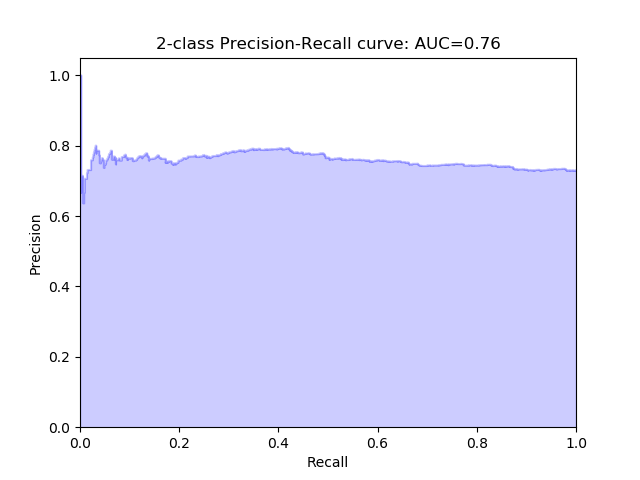

Text(0.5,1,'2-class Precision-Recall curve: AUC=0.76')

In [198]:
plt.figure()

plt.step(rec, prec, color='b', alpha=0.2,
         where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

<IPython.core.display.Javascript object>


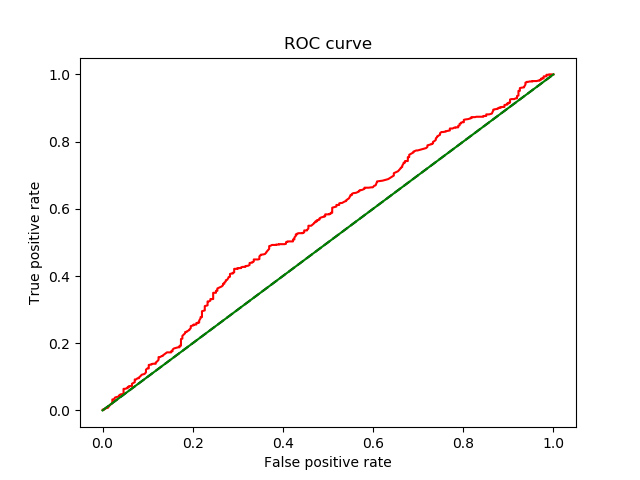

In [199]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores.ravel())
fpr1, tpr1, _ = roc_curve(y_test, predicted)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color = "red")
plt.plot(fpr1, tpr1, color = "green")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()